In [4]:
import numpy as np
import random

Defining policy

In [142]:
class Epsilon_greedy:
  def __init__(self,epsilon):
    self.epsilon=epsilon
  def action(self,q_values,state):
    eps=np.random.rand()
    q=q_values[str(state)]
    if eps>self.epsilon:
      i_valid=np.where(state==0)[0]
      q_valid=q[i_valid]
      a=i_valid[q_valid.argmax()]
 
      return a
    else:
      s=np.where(state==0)[0]
      a=np.random.choice(s)
      return a



Agen class

In [204]:

class Agent:
  def __init__(self):
    self.policy=Epsilon_greedy(0.2)
    self.q_values={}
    self.gamma=0.99
    self.alpha=0.01
    self.loss=torch.nn.MSELoss()
  def action(self,state):
    if str(state) not in self.q_values.keys():
      self.q_values[str(state)]=np.zeros((9))
    action=self.policy.action(self.q_values,state)
    return action
  def greedy_action(self,state):
    if str(state) not in self.q_values.keys():
      self.q_values[str(state)]=np.zeros((9))
    q=self.q_values[str(state)]
    i_valid=np.where(state==0)[0]
    q_valid=q[i_valid]
    a=i_valid[q_valid.argmax()]
    return a
  def update(self,state,action,next_state,next_action,reward,terminal):

        q_prev=self.q_values[str(state)][action]
        if terminal:
          target=reward
        else:
          target=reward+self.gamma*self.q_values[str(next_state)][next_action]
        self.q_values[str(state)][action]+=reward+self.alpha*(target-q_prev)



Environment class

In [144]:
class Environment:
  def __init__(self):
    self.__state=np.zeros((3,3))
  def reward(self,state):
    s=state
    for i in range(3):
      if np.abs(np.sum(s[:][i]))==3:
        return (np.sum(s[:][i])//3)
      if np.abs(np.sum(s[i][:]))==3:
        return (np.sum(s[i][:])//3)
    if np.abs(s[0][0]+s[1][1]+s[2][2])==3:
      return ((s[0][0]+s[1][1]+s[2][2])//3)
    if np.abs(s[0][2]+s[1][1]+s[2][0])==3:
      return ((s[0][2]+s[1][1]+s[2][0])//3)
    if np.sum(s==0)==0:
      return 1
    else:
      return 0
  def step(self,action,sign):
      i=action//3
      j=action%3
      self.__state[i][j]=sign
      r=self.reward(self.__state)
      return self.__state.copy(),r,r!=0
  def reset(self):
    self.__state=np.zeros((3,3))
    return self.__state

test function

it only plays game with a ranodm agent....

In [213]:


def test(episodes,agent):
  env=Environment()
  batch_size=100
  rewards=[]
  plot=[]
  for episode in range(1,episodes+1):

    state=env.reset()
    done=False
    while not done:
      a=agent.greedy_action(state.reshape((9)))
      next_state,r,done=env.step(a,1)

      if done:
        break
      t=np.where(next_state.reshape((9))==0)[0]
      a2=np.random.choice(t)
      next_state,r,done=env.step(a2,-1)
      if done:
        break
      state=next_state
    rewards.append(r)
    if episode%1000==0:
      m=np.mean(rewards)
      plot.append(m)
      print("episode:",episode,"  mean reward:",m)
      rewards=[]
  return plot



**Q-learing with**

In [218]:


def train(episodes,agent):
  env=Environment()
  batch_size=100
  rewards=[]
  plot=[]
  for episode in range(1,episodes+1):

    state=env.reset()
    done=False
    while not done:
      a=agent.action(state.reshape((9)))
      next_state,r,done=env.step(a,1)

      if done:
        agent.update(state.reshape((9)),a,next_state.reshape((9)),None,r,done)
        break
      t=np.where(next_state.reshape((9))==0)[0]
      a2=np.random.choice(t)
      next_state,r,done=env.step(a2,-1)
      if done:
        agent.update(state.reshape((9)),a,next_state.reshape((9)),None,r,done)
        break

      a_next=agent.greedy_action(next_state.reshape((9)))
      agent.update(state.reshape((9)),a,next_state.reshape((9)),a_next,r,done)
      state=next_state
    rewards.append(r)
    if episode%1000==0:
      m=np.mean(rewards)
      plot.append(m)
      print("episode:",episode,"  mean reward:",m)
      rewards=[]
  return plot



In [219]:
agent=Agent()
history=train(30000,agent)

episode: 1000   mean reward: 0.83
episode: 2000   mean reward: 0.858
episode: 3000   mean reward: 0.884
episode: 4000   mean reward: 0.868
episode: 5000   mean reward: 0.882
episode: 6000   mean reward: 0.912
episode: 7000   mean reward: 0.884
episode: 8000   mean reward: 0.922
episode: 9000   mean reward: 0.922
episode: 10000   mean reward: 0.924
episode: 11000   mean reward: 0.928
episode: 12000   mean reward: 0.916
episode: 13000   mean reward: 0.886
episode: 14000   mean reward: 0.898
episode: 15000   mean reward: 0.914
episode: 16000   mean reward: 0.93
episode: 17000   mean reward: 0.946
episode: 18000   mean reward: 0.906
episode: 19000   mean reward: 0.926
episode: 20000   mean reward: 0.914
episode: 21000   mean reward: 0.91
episode: 22000   mean reward: 0.94
episode: 23000   mean reward: 0.922
episode: 24000   mean reward: 0.944
episode: 25000   mean reward: 0.924
episode: 26000   mean reward: 0.944
episode: 27000   mean reward: 0.948
episode: 28000   mean reward: 0.908
episo

episode: 1000   mean reward: 1.0
episode: 2000   mean reward: 1.0
episode: 3000   mean reward: 1.0
episode: 4000   mean reward: 1.0
episode: 5000   mean reward: 1.0
episode: 6000   mean reward: 1.0
episode: 7000   mean reward: 1.0
episode: 8000   mean reward: 1.0
episode: 9000   mean reward: 1.0
episode: 10000   mean reward: 1.0


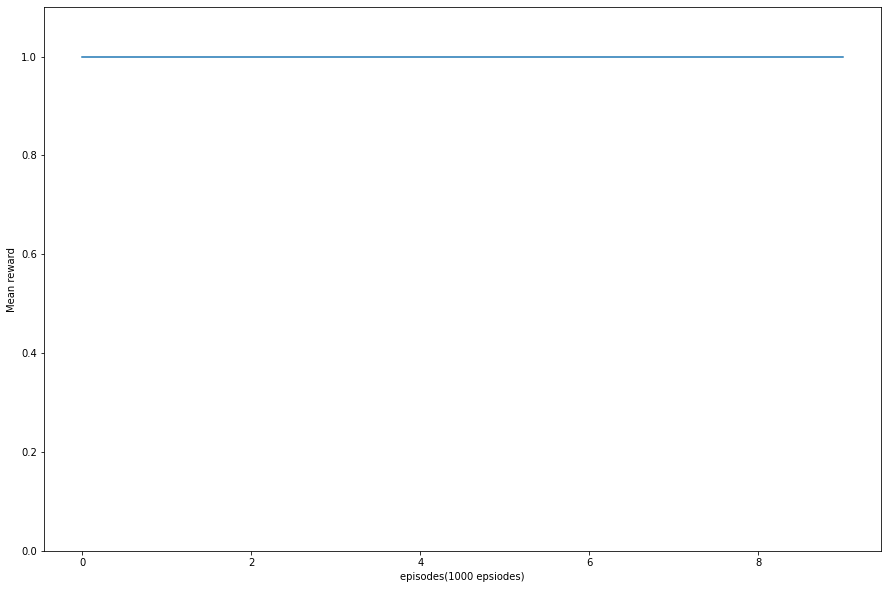

In [221]:

history=test(10000,agent)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(np.arange(len(history)),history)
plt.ylim([0,1.1])
plt.xlabel("episodes(1000 epsiodes)")
plt.ylabel("Mean reward")
plt.show()

**Adversarial Q learing**

In this experiment,there are two agent that are going to learn using Q learning.Both of them are updated during the training.Interestngly,one of them finally defeats another!!

In [209]:


def train(episodes,agent1,agent2):
  env=Environment()
  batch_size=100
  rewards=[]
  plot=[]

  for episode in range(1,episodes+1):

    state1=env.reset()
    done=False
    flag=False
    while not done:
      a1=agent1.action(state1.reshape((9)))
      next_state1,r,done=env.step(a1,1)
      if done:
        agent1.update(state1.reshape((9)),a1,None,None,r,done)
        if flag:
          agent2.update(state2.reshape((9)),a2,None,None,-r,done)
        break

      if flag:
        a2_next=agent2.greedy_action(next_state1.reshape((9)))
        agent2.update(state2.reshape((9)),a2,next_state1.reshape((9)),a2_next,r,done)

      
      state2=next_state1
      a2=agent2.action(state2.reshape((9)))
      next_state2,r,done=env.step(a2,-1)

      if done:
        agent2.update(state2.reshape((9)),a2,None,None,-r,done)
        agent1.update(state1.reshape((9)),a1,None,None,r,done)
        break

      a1_next=agent1.greedy_action(next_state2.reshape((9)))
      agent1.update(state1.reshape((9)),a1,next_state2.reshape((9)),a1_next,r,done)


      state1=next_state2
      flag=True

    rewards.append(r)
    if episode%1000==0:
      m=np.mean(rewards)
      plot.append(m)
      print("episode:",episode,"  mean reward:",m)
      rewards=[]
  return plot
   
      
    



In [210]:

agent1=Agent()
agent2=Agent()
history=train(30000,agent1,agent2)

episode: 1000   mean reward: 0.71
episode: 2000   mean reward: 0.758
episode: 3000   mean reward: 0.758
episode: 4000   mean reward: 0.782
episode: 5000   mean reward: 0.768
episode: 6000   mean reward: 0.812
episode: 7000   mean reward: 0.742
episode: 8000   mean reward: 0.764
episode: 9000   mean reward: 0.778
episode: 10000   mean reward: 0.838
episode: 11000   mean reward: 0.786
episode: 12000   mean reward: 0.832
episode: 13000   mean reward: 0.794
episode: 14000   mean reward: 0.818
episode: 15000   mean reward: 0.828
episode: 16000   mean reward: 0.792
episode: 17000   mean reward: 0.796
episode: 18000   mean reward: 0.772
episode: 19000   mean reward: 0.828
episode: 20000   mean reward: 0.786
episode: 21000   mean reward: 0.802
episode: 22000   mean reward: 0.812
episode: 23000   mean reward: 0.814
episode: 24000   mean reward: 0.776
episode: 25000   mean reward: 0.808
episode: 26000   mean reward: 0.78
episode: 27000   mean reward: 0.836
episode: 28000   mean reward: 0.812
epi

episode: 1000   mean reward: 1.0
episode: 2000   mean reward: 1.0
episode: 3000   mean reward: 1.0
episode: 4000   mean reward: 1.0
episode: 5000   mean reward: 1.0
episode: 6000   mean reward: 1.0
episode: 7000   mean reward: 1.0
episode: 8000   mean reward: 1.0
episode: 9000   mean reward: 1.0
episode: 10000   mean reward: 1.0


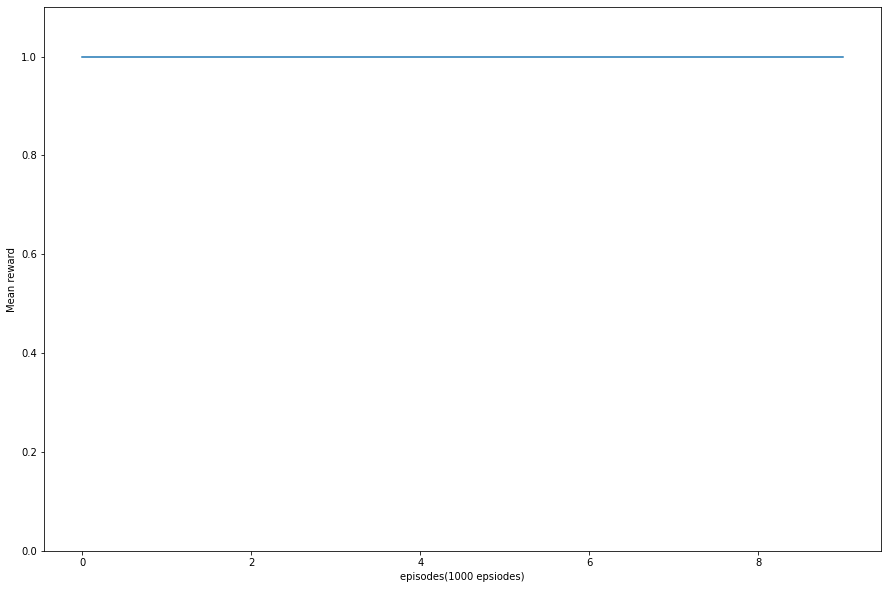

In [217]:

history=test(10000,agent1)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(np.arange(len(history)),history)
plt.ylim([0,1.1])
plt.xlabel("episodes(1000 epsiodes)")
plt.ylabel("Mean reward")
plt.show()